In [1]:
!git clone https://github.com/AmarSaini/Epoching_StyleGan2_Setup.git

Cloning into 'Epoching_StyleGan2_Setup'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 106 (delta 10), reused 93 (delta 6), pack-reused 0
Receiving objects: 100% (106/106), 3.81 MiB | 7.12 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import os

os.chdir('/content/Epoching_StyleGan2_Setup')

In [3]:
!git clone https://github.com/cleardusk/3DDFA.git

Cloning into '3DDFA'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 787 (delta 6), reused 2 (delta 0), pack-reused 773
Receiving objects: 100% (787/787), 81.43 MiB | 30.40 MiB/s, done.
Resolving deltas: 100% (418/418), done.


In [4]:
!pip install requests
!pip install Pillow
!pip install dlib
!pip install tensorflow==1.15
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 512kB 44.6MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 3.8MB 51.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=bb2e243c7594e3f0b96121dac30124e4a17cead7a824433238e554539f271782
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [5]:
import sys
sys.path.append('stylegan2/')

from stylegan2 import pretrained_networks
from stylegan2 import dnnlib
from stylegan2.dnnlib import tflib

from pathlib import Path
from PIL import Image
import pickle
import numpy as np

import ipywidgets as widgets

model_path = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'
results_size = 1024

In [5]:
# Code to load the StyleGAN2 Model
def load_model():
    _G, _D, Gs = pretrained_networks.load_networks(model_path)
    
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
    
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    
    return Gs, noise_vars, Gs_kwargs

# Generate images given a random seed (Integer)
def generate_image_random(rand_seed):
    rnd = np.random.RandomState(rand_seed)
    z = rnd.randn(1, *Gs.input_shape[1:])
    tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars})
    images = Gs.run(z, None, **Gs_kwargs)
    return images, z

# Generate images given a latent code ( vector of size [1, 512] )
def generate_image_from_z(z):
    images = Gs.run(z, None, **Gs_kwargs)
    return images

In [7]:
Gs, noise_vars, Gs_kwargs = load_model()

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [9]:
!ls

3DDFA	       datasets_stylegan2  README.md  stylegan2directions
align_face.py  imgs		   stylegan2


In [10]:
os.mkdir('images/')

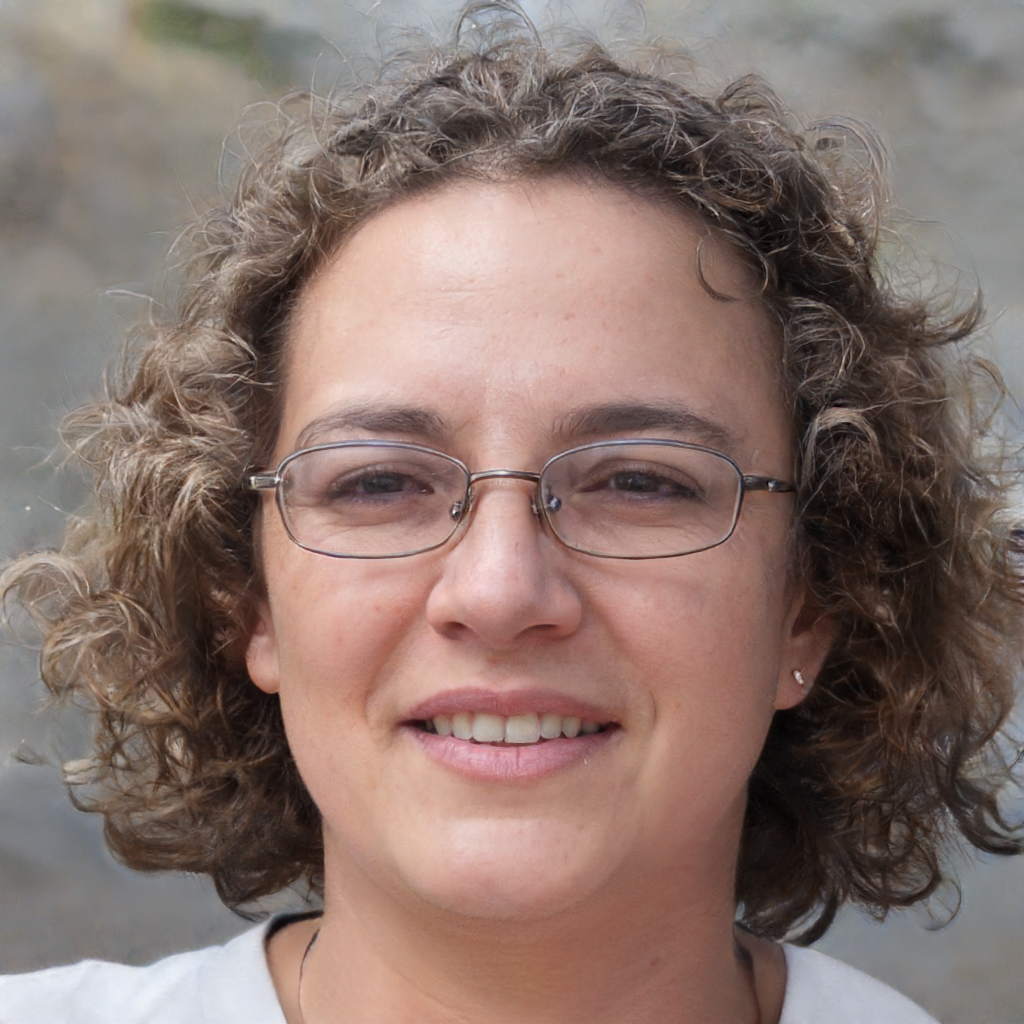

In [11]:
random_num = np.random.randint(0, 4294967295)
image, latent_code1 = generate_image_random(random_num)
image = Image.fromarray(image[0]).resize((results_size, results_size))
image.save('/content/Epoching_StyleGan2_Setup/images/image.jpg')
image

In [12]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [1]:
import sys
import os

os.chdir('/content/Epoching_StyleGan2_Setup')

sys.path.append('stylegan2/')

from stylegan2 import pretrained_networks
from stylegan2 import dnnlib
from stylegan2.dnnlib import tflib

from pathlib import Path
from PIL import Image
import pickle
import numpy as np

import ipywidgets as widgets

model_path = 'gdrive:networks/stylegan2-ffhq-config-f.pkl'
results_size = 1024

In [2]:
!python -W ignore stylegan2/dataset_tool.py create_from_images datasets_stylegan2/custom_imgs images/

Loading images from "images/"
Creating dataset "datasets_stylegan2/custom_imgs"
Added 1 images.


In [3]:
!python -W ignore stylegan2/epoching_custom_run_projector.py project-real-images --network=$model_path \
  --dataset=custom_imgs --data-dir=datasets_stylegan2 --num-images=1 --num-snapshots 100

Local submit - run_dir: results/00000-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from "custom_imgs"...
tcmalloc: large alloc 4294967296 bytes == 0x561a3203a000 @  0x7f80c3d18001 0x7f80c189654f 0x7f80c18e6b58 0x7f80c18eab17 0x7f80c1989203 0x5619db31a0e4 0x5619db319de0 0x5619db38e6f5 0x5619db388e0d 0x5619db31c02c 0x5619db35cd39 0x5619db359c84 0x5619db31c231 0x5619db38b1e6 0x5619db388b0e 0x5619db31b77a 0x5619db38a86a 0x5619db388b0e 0x5619db25ae2b 0x5619db38b1e6 0x5619db31b69a 0x5619db389a45 0x5619db31b69a 0x5619db389c9e 0x5619db388b0e 0x5619db25ae2b 0x5619db38b1e6 0x5619db31b69a 0x5619db389a45 0x5619db388b0e 0x5619db388813
tcmalloc: large alloc 4294967296 bytes == 0x561b3203a000 @  0x7f80c3d161e7 0x

In [4]:
def load_model():
    _G, _D, Gs = pretrained_networks.load_networks(model_path)
    
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
    
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    
    return Gs, noise_vars, Gs_kwargs


def get_final_latents():
    all_results = list(Path('results/').iterdir())
    print(all_results)
    all_results.sort()
    
    last_result = all_results[-1]

    latent_files = [x for x in last_result.iterdir() if 'final_latent_code' in x.name]
    latent_files.sort()
    
    all_final_latents = []
    
    for file in latent_files:
        with open(file, mode='rb') as latent_pickle:
            all_final_latents.append(pickle.load(latent_pickle))
    
    return all_final_latents


def get_control_latent_vectors(path):
    files = [x for x in Path(path).iterdir() if str(x).endswith('.npy')]
    latent_vectors = {f.name[:-4]:np.load(f) for f in files}
    return latent_vectors


def generate_image_from_projected_latents(latent_vector):
    images = Gs.components.synthesis.run(latent_vector, **Gs_kwargs)
    return images

In [5]:
Gs, noise_vars, Gs_kwargs = load_model()

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [6]:
latent_codes = get_final_latents()
len(latent_codes), latent_codes[0].shape

[PosixPath('results/00000-project-real-images')]


(1, (1, 18, 512))

In [7]:
latent_controls = get_control_latent_vectors('stylegan2directions/')
len(latent_controls), latent_controls.keys(), latent_controls['age'].shape

(16,
 dict_keys(['eyes_open', 'lip_ratio', 'nose_tip', 'roll', 'mouth_open', 'yaw', 'pitch', 'age', 'mouth_ratio', 'smile', 'nose_mouth_distance', 'eye_distance', 'eye_ratio', 'eye_eyebrow_distance', 'gender', 'nose_ratio']),
 (18, 512))

In [16]:
def apply_latent_controls(self):
    
    image_outputs = controller.children[0]
    feature_sliders = controller.children[1]
    
    slider_hboxes = feature_sliders.children[:-2]
    latent_movements = [(x.children[1].value, x.children[0].value) for x in slider_hboxes]

    modified_latent_code = np.array(latent_code_to_use)
    for feature, amount_to_move in latent_movements:
        modified_latent_code += latent_controls[feature]*amount_to_move

    images = generate_image_from_projected_latents(modified_latent_code)
    latent_img = Image.fromarray(images[0]).resize((1024, 1024))
    
    latent_img_output = image_outputs.children[1]
    latent_img.save('/content/Epoching_StyleGan2_Setup/3DDFA/samples/image.jpg')

    with latent_img_output:
        latent_img_output.clear_output()
        display(latent_img)
    

def reset_latent_controls(self):
    
    image_outputs = controller.children[0]
    feature_sliders = controller.children[1]
    
    slider_hboxes = feature_sliders.children[:-2]
    for x in slider_hboxes:
        x.children[0].value = 0
        
    latent_img_output = image_outputs.children[1]
    with latent_img_output:
        latent_img_output.clear_output()
        display(image_to_use)

def create_interactive_latent_controller():
    orig_img_output = widgets.Output()

    with orig_img_output:
        orig_img_output.clear_output()
        display(image_to_use)

    latent_img_output = widgets.Output()

    with latent_img_output:
        latent_img_output.clear_output()
        display(image_to_use)

    image_outputs = widgets.VBox([orig_img_output, latent_img_output])

    generate_button = widgets.Button(description='Generate', layout=widgets.Layout(width='50%', height='3%'))
    generate_button.on_click(apply_latent_controls)

    reset_button = widgets.Button(description='Reset Latent Controls', layout=widgets.Layout(width='50%', height='3%'))
    reset_button.on_click(reset_latent_controls)

    feature_sliders = []
    for feature in latent_controls:
        label = widgets.Label(feature)
        slider = widgets.FloatSlider(min=-25, max=25)
        feature_sliders.append(widgets.HBox([slider, label]))
    feature_sliders.append(generate_button)
    feature_sliders.append(reset_button)
    # feature_sliders.append(save_button)

    feature_sliders = widgets.VBox(feature_sliders)

    return widgets.HBox([image_outputs, feature_sliders])

In [17]:
image = Image.open('/content/Epoching_StyleGan2_Setup/images/image.jpg')

latent_code_to_use = latent_codes[0]
image_to_use = image

controller = create_interactive_latent_controller()
controller

In [18]:
os.chdir('/content/Epoching_StyleGan2_Setup/3DDFA/utils/cython')

In [19]:
!python3 setup.py build_ext -i

running build_ext
skipping 'mesh_core_cython.cpp' Cython extension (up-to-date)


Load model


In [20]:
os.chdir('/content/Epoching_StyleGan2_Setup/3DDFA')

In [24]:
!python main.py -f samples/image.jpg

Dump tp samples/image_0.ply
Save 68 3d landmarks to samples/image_0.txt
Dump obj with sampled texture to samples/image_0.obj
Dump to samples/image_pose.jpg
Dump to samples/image_depth.png
Dump to samples/image_pncc.png
Save visualization result to samples/image_3DDFA.jpg
<Figure size 1200x1200 with 1 Axes>


In [25]:
!pip install trimesh

     |████████████████████████████████| 634kB 8.1MB/s 


In [27]:
import trimesh
import numpy as np

In [29]:
face = trimesh.load('/content/Epoching_StyleGan2_Setup/3DDFA/samples/image_0.obj', force='mesh' )
face.invert()
face.show()


Output hidden; open in https://colab.research.google.com to view.

In [30]:
#   Rotate Z-coordinate (ROLL)
alpha = np.radians(-90)

rotation_matrix = np.array([[np.cos(alpha),  -np.sin(alpha),       0,        0],
                            [np.sin(alpha),   np.cos(alpha),       0,        0],
                            [            0,               0,       1,        0],
                            [            0,               0,       0,        1]])

face.apply_transform(rotation_matrix)
face.export('/content/result.obj')
face.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
face = trimesh.load('/content/result.obj')
os.mkdir('/content/results/')

In [33]:
start_radian = -30
end_radian = 30
step = 10

def apply_roll_rotate(angle, face):
    alpha = np.radians(angle)
    rotation_matrix = np.array([[np.cos(alpha),  -np.sin(alpha),       0,        0],
                                [np.sin(alpha),   np.cos(alpha),       0,        0],
                                [            0,               0,       1,        0],
                                [            0,               0,       0,        1]])
    
    face.apply_transform(rotation_matrix)

def apply_yaw_rotate(angle, face):
    alpha = np.radians(angle)
    rotation_matrix = np.array([[ np.cos(alpha),               0,       np.sin(alpha),        0],
                                [             0,               1,                   0,        0],
                                [-np.sin(alpha),               0,       np.cos(alpha),        0],
                                [             0,               0,                   0,        1]])
    
    face.apply_transform(rotation_matrix)

def apply_pitch_rotate(angle, face):
    alpha = np.radians(angle)
    rotation_matrix = np.array([[1,                 0,                   0,        0],
                                [0,     np.cos(alpha),      -np.sin(alpha),        0],
                                [0,     np.sin(alpha),       np.cos(alpha),        0],
                                [0,                 0,                   0,        1]])
    
    face.apply_transform(rotation_matrix)

In [35]:
for angle_yaw in range(start_radian, end_radian, step):
    for angle_pitch in range(start_radian, end_radian, step):
        for angle_roll in range(start_radian, end_radian, step):
            face1 = face.copy()
            apply_yaw_rotate(angle_yaw, face1)
            apply_pitch_rotate(angle_pitch, face1)
            apply_roll_rotate(angle_roll, face1)
            face1.export(f'/content/results/{angle_yaw}_{angle_pitch}_{angle_roll}_rotate.obj')

In [ ]:
!zip -r /content/file.zip /content/results

In [37]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>